In [1]:
import os
import os.path as osp
from os.path import join as pjoin
import time
from datetime import datetime
import json

import numpy as np
np.seterr(all='raise')
from PIL import Image

from lpf.data import load_model_dicts
from lpf.initializers import LiawInitializer
from lpf.models import LiawModel
from lpf.solvers import EulerSolver, RungeKuttaSolver

In [2]:
batch_size = 1  # A single set of parameters
device = "cpu"  # Device option: CPU or GPU

# Time parameters
dt = 0.01
n_iters = 500000

# Space parameters
dx = 0.1
width = 128
height = 128
shape = (height, width)

In [3]:
# Create the output directory.
str_now = datetime.now().strftime('%Y%m%d-%H%M%S')
dpath_output = pjoin(osp.abspath("./output"), "experiment_batch_%s" % (str_now))
os.makedirs(dpath_output, exist_ok=True)

In [4]:
# Create a dict for parameters.
param_dict = {
    "u0": 2.0, "v0": 1.0,
    "Du": 0.0005, "Dv": 0.075,
    "ru": 0.18, "rv": 0.02874,
    "su": 0.001, "sv": 0.025, 
    "k": 0.084, 
    "mu": 0.08     
}

In [5]:
# In this example, we use random positions for initializing u with u0.
for i in range(25):
    param_dict["init_pts_%d"%(i+1)] = (np.random.randint(0, height), np.random.randint(0, width))

In [6]:
param_dict

{'u0': 2.0,
 'v0': 1.0,
 'Du': 0.0005,
 'Dv': 0.075,
 'ru': 0.18,
 'rv': 0.02874,
 'su': 0.001,
 'sv': 0.025,
 'k': 0.084,
 'mu': 0.08,
 'init_pts_1': (109, 49),
 'init_pts_2': (51, 86),
 'init_pts_3': (106, 0),
 'init_pts_4': (21, 22),
 'init_pts_5': (2, 31),
 'init_pts_6': (89, 14),
 'init_pts_7': (37, 92),
 'init_pts_8': (13, 24),
 'init_pts_9': (46, 75),
 'init_pts_10': (46, 20),
 'init_pts_11': (23, 96),
 'init_pts_12': (24, 121),
 'init_pts_13': (33, 76),
 'init_pts_14': (49, 94),
 'init_pts_15': (124, 25),
 'init_pts_16': (89, 43),
 'init_pts_17': (52, 116),
 'init_pts_18': (41, 31),
 'init_pts_19': (40, 58),
 'init_pts_20': (118, 119),
 'init_pts_21': (22, 73),
 'init_pts_22': (19, 126),
 'init_pts_23': (62, 99),
 'init_pts_24': (61, 103),
 'init_pts_25': (70, 71)}

In [7]:
param_dicts = []
param_dicts.append(param_dict)

In [8]:
# Create the Liaw initializer.
initializer = LiawInitializer()
initializer.update(param_dicts)
params = LiawModel.parse_params(param_dicts)

In [9]:
# Create the Liaw model.
model = LiawModel(
    initializer=initializer,
    params=params,
    dx=dx,
    width=width,
    height=height,
    device=device
)

In [10]:
# Create the Euler solver.
solver = EulerSolver()

t_beg = time.time()

solver.solve(
    model=model,
    dt=dt,
    n_iters=n_iters,
    period_output=10000,
    dpath_model=dpath_output,
    dpath_ladybird=dpath_output,
    dpath_pattern=dpath_output,
    verbose=1
)

t_end = time.time()

print("Elapsed time: %f sec." % (t_end - t_beg))

- [Iteration #1] elapsed time: 1.15142e-02 sec.
- [Iteration #10000] elapsed time: 2.04922e+00 sec.
- [Iteration #20000] elapsed time: 2.06464e+00 sec.
- [Iteration #30000] elapsed time: 2.08152e+00 sec.
- [Iteration #40000] elapsed time: 2.11175e+00 sec.
- [Iteration #50000] elapsed time: 2.08347e+00 sec.
- [Iteration #60000] elapsed time: 2.07002e+00 sec.
- [Iteration #70000] elapsed time: 2.09929e+00 sec.
- [Iteration #80000] elapsed time: 2.11194e+00 sec.
- [Iteration #90000] elapsed time: 2.13198e+00 sec.
- [Iteration #100000] elapsed time: 2.01617e+00 sec.
- [Iteration #110000] elapsed time: 2.07174e+00 sec.
- [Iteration #120000] elapsed time: 2.04237e+00 sec.
- [Iteration #130000] elapsed time: 2.13069e+00 sec.
- [Iteration #140000] elapsed time: 2.06280e+00 sec.
- [Iteration #150000] elapsed time: 2.07048e+00 sec.
- [Iteration #160000] elapsed time: 2.10070e+00 sec.
- [Iteration #170000] elapsed time: 2.25329e+00 sec.
- [Iteration #180000] elapsed time: 2.07166e+00 sec.
- [Iter

In [11]:
# Sub-directories in the output directory
!ls {dpath_output}

model_1
models


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1e27ff07520>
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [12]:
# Generated images
dpath_images = pjoin(dpath_output, "model_1")
dpath_images

'D:\\repos\\lpf\\tutorials\\output\\experiment_batch_20230224-160102\\model_1'

In [13]:
!ls {dpath_images}

ladybird_000001.png
ladybird_010000.png
ladybird_020000.png
ladybird_030000.png
ladybird_040000.png
ladybird_050000.png
ladybird_060000.png
ladybird_070000.png
ladybird_080000.png
ladybird_090000.png
ladybird_100000.png
ladybird_110000.png
ladybird_120000.png
ladybird_130000.png
ladybird_140000.png
ladybird_150000.png
ladybird_160000.png
ladybird_170000.png
ladybird_180000.png
ladybird_190000.png
ladybird_200000.png
ladybird_210000.png
ladybird_220000.png
ladybird_230000.png
ladybird_240000.png
ladybird_250000.png
ladybird_260000.png
ladybird_270000.png
ladybird_280000.png
ladybird_290000.png
ladybird_300000.png
ladybird_310000.png
ladybird_320000.png
ladybird_330000.png
ladybird_340000.png
ladybird_350000.png
ladybird_360000.png
ladybird_370000.png
ladybird_380000.png
ladybird_390000.png
ladybird_400000.png
ladybird_410000.png
ladybird_420000.png
ladybird_430000.png
ladybird_440000.png
ladybird_450000.png
ladybird_460000.png
ladybird_470000.png
ladybird_480000.png
ladybird_490000.png


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1e27feec400>


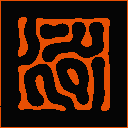

In [14]:
# Show the pattern at last.
img_pattern = Image.open(pjoin(dpath_images, "pattern_500000.png"))
img_pattern

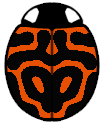

In [15]:
img_ladybird = Image.open(pjoin(dpath_images, "ladybird_500000.png"))
img_ladybird

In [16]:
# Model file
!ls {pjoin(dpath_output, "models")}

model_1.json


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1e265036880>


In [17]:
fpath_model = pjoin(dpath_output, "models", "model_1.json")
with open(fpath_model, "rt") as fin:
    model_dict = json.load(fin)
    
model_dict

{'index': 0,
 'generation': None,
 'fitness': None,
 'Du': 0.0005,
 'Dv': 0.075,
 'ru': 0.18,
 'rv': 0.02874,
 'k': 0.084,
 'su': 0.001,
 'sv': 0.025,
 'mu': 0.08,
 'width': 128,
 'height': 128,
 'dx': 0.1,
 'thr_color': 0.5,
 'color_u': [5, 5, 5],
 'color_v': [231, 79, 3],
 'initializer': 'LiawInitializer',
 'u0': 2.0,
 'v0': 1.0,
 'n_init_pts': 25,
 'init_pts_0': [109, 49],
 'init_pts_1': [51, 86],
 'init_pts_2': [106, 0],
 'init_pts_3': [21, 22],
 'init_pts_4': [2, 31],
 'init_pts_5': [89, 14],
 'init_pts_6': [37, 92],
 'init_pts_7': [13, 24],
 'init_pts_8': [46, 75],
 'init_pts_9': [46, 20],
 'init_pts_10': [23, 96],
 'init_pts_11': [24, 121],
 'init_pts_12': [33, 76],
 'init_pts_13': [49, 94],
 'init_pts_14': [124, 25],
 'init_pts_15': [89, 43],
 'init_pts_16': [52, 116],
 'init_pts_17': [41, 31],
 'init_pts_18': [40, 58],
 'init_pts_19': [118, 119],
 'init_pts_20': [22, 73],
 'init_pts_21': [19, 126],
 'init_pts_22': [62, 99],
 'init_pts_23': [61, 103],
 'init_pts_24': [70, 71],


In [18]:
from lpf.visualization import merge_images

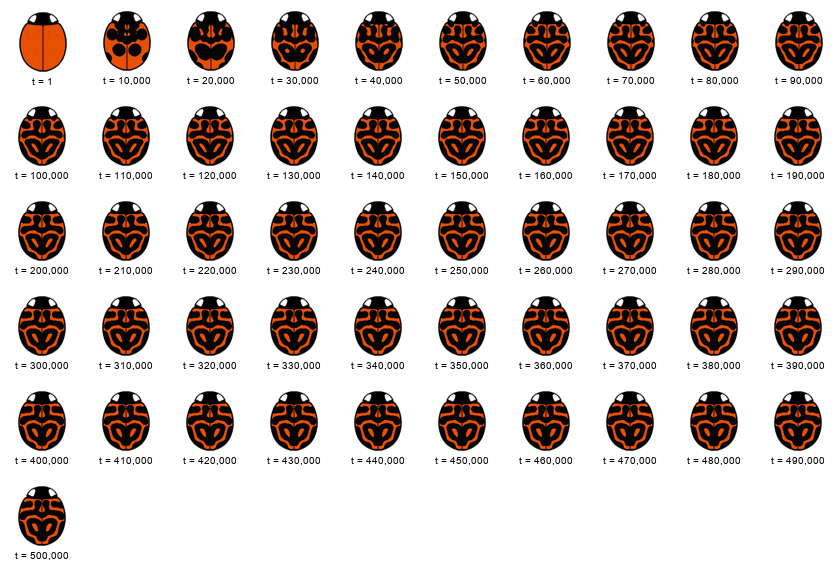

In [19]:
# Visualize the temporal evolution of ladybird by merging images.
img_ladybirds = merge_images(dpath_images,
                             n_cols=10,
                             infile_header="ladybird",
                             ratio_resize=0.5,
                             text_format="t = ",
                             font_size=10,
                             text_margin_ratio=.1)
img_ladybirds

In [20]:
img_ladybirds.save(pjoin(dpath_output, "output_ladybird.png"))

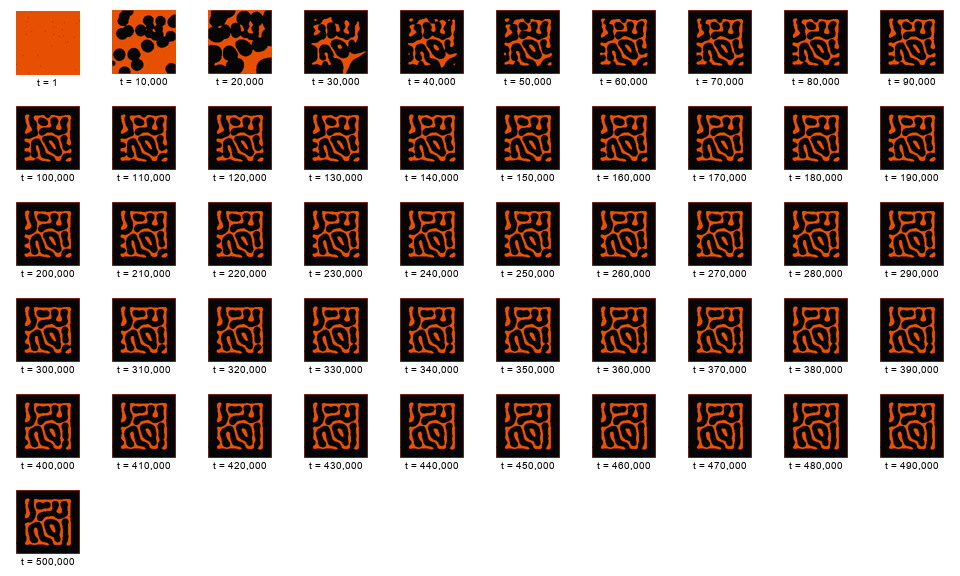

In [21]:
img_patterns = merge_images(dpath_images,
                            n_cols=10,
                            infile_header="pattern",
                            ratio_resize=0.5,
                            text_format="t = ",
                            font_size=10,
                            text_margin_ratio=.1)
img_patterns

In [22]:
img_patterns.save(pjoin(dpath_output, "output_pattern.png"))